# Goal: explore various data exploration techniques 

### interact with different examples - just to see how they work, 

### Think graphically

you can always recreate an example on new data by visualizing what you want to graph, what patterns in data do you want to explore, then learn how to search for such examples online





In [27]:
# %load churnlab_utils.py
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from itertools import compress
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import math
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
#import tensorflow as tf
	
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import matplotlib.pyplot as plt
    import numpy as np
    plt.imshow(cm, interpolation='nearest', cmap=cmap,aspect='auto')
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig('confusion_mat.png', bbox_inches='tight', format='png', dpi=300, pad_inches=0,transparent=True)
    plt.show()
    return
	
def pdutil_describeItemRange(df):  # Show the number of unique values in each column
    """pdutil_describeItemRange performs is similar to descrive for a DataFrame"""
    """but it displays the number of unique values in each column"""
    """argument is a dataFrame """
    """return is smaller dataFrame with the same columns as the original"""
    cols = df.columns.tolist()
    vals = pd.DataFrame ( [ len(set(df[s])) for s in df.columns.tolist()] ).T
    vals.columns = cols
    return vals

def pdutil_factorize(df):
    """pdutil_factorize performs converts every categorical column in a dataFrame to numeric values"""
    """pass in a DataFrame"""
    """return value is a similar dataFrame but with categorical values converted to numbers"""    
    return  df.apply(lambda x: pd.factorize(x)[0])

def pdutil_OneHotEncode(pdold, StaticCols, EncodeCols):
    """pdutil_OneHotEncode performs OneHotEncoding on specified columns in our dataframe"""
    """pdold is the old dataframe we are paasing in"""
    """StaticCols is a list of columns we do not wish to encode"""
    """EncodeCols is a list of columns we wish to encode"""
    """Returns a modified DataFrame with oneHotEncoded columns"""
    # make sure that we our static list is not in our encode list
    cols_OneHotEncode = sorted(list(set(EncodeCols) - set(StaticCols)))
    # create a new dataframe which represents the static columns
    pdnew = pdold[StaticCols]
    # loop thru the endcode list and OneHotEncode (using get_dummies) each column in the encode list
    # note - this will typically map a single column to several columns - one for each value contained in the original column
    for col in cols_OneHotEncode:
        new_names = []
        enc = pd.get_dummies(pdold[col])
        for subcol in  enc:
            name = col + str(subcol)
            new_names.append(name)
        enc.columns = new_names
        # concat the new OneHotEnoded dataframe to the original
        pdnew = pd.concat([pdnew, enc], axis=1)
    return pdnew


def pdutil_dbscan(df, eps_):
# Compute DBSCAN
    labels = []
    db = DBSCAN(eps=eps_, min_samples=100).fit(df)
    labels = pd.DataFrame(db.labels_ )
    #n_clusters_ = labels[0].madf()
    n_clusters_ = len(list(set(db.labels_))) - (1 if -1 in db.labels_ else 0)
    # Number of clusters in labels, ignoring noise if present.
    tdft = 'dbsPCA'
    df[tdft]=labels
    print('eps:{} Estimated number of clusters: {}'.format(eps_, n_clusters_) ) 
    return df, labels, n_clusters_

## import tensorflow as tf
import numpy as np
import pandas as pd
import math

from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
#import tensorflow as tf
import numpy as np

CLASS_SIZE = 2
#DATA_SIZE = 0

def load_csv(filename):
    file = pd.read_csv(filename, header=0)

    # get sample's metadata
    n_samples = int(file.columns[0])
    n_features = int(file.columns[1])

    # divide samples into explanation variables and target variable
    data = np.empty((n_samples, n_features))
    target = np.empty((n_samples,), dtype=np.int)
    for i, row in enumerate(file.itertuples()):
        target[i] = np.asarray(row[-1], dtype=np.int)
        data[i] = np.asarray(row[1:n_features+1], dtype=np.float64)
    return (data, target)

# output train data 
def get_batch_data(x_train, y_train, size=None):
    if size is None:
        size = len(x_train)
    batch_xs = x_train
    batch_ys = []

    # convert to 1-of-N vector
    for i in range(len(y_train)):
        val = np.zeros((CLASS_SIZE), dtype=np.float64)
        val[y_train[i]] = 1.0
        batch_ys.append(val)
    batch_ys = np.asarray(batch_ys)
    return batch_xs[:size], batch_ys[:size]

# output test data
def get_test_data(x_test, y_test):
    batch_ys = []

    # convert to 1-of-N vector
    for i in range(len(y_test)):
        val = np.zeros((CLASS_SIZE), dtype=np.float64)
        val[y_test[i]] = 1.0
        batch_ys.append(val)
    return x_test, np.asarray(batch_ys)

# for parameter initialize
def get_stddev(in_dim, out_dim):
    return 1.3 / math.sqrt(float(in_dim) + float(out_dim))

# DNN Model Class
class Classifier:
    def __init__(self, hidden_units=[10], n_classes=0, data_size = 0):
        self._hidden_units = hidden_units
        self._n_classes = n_classes
        self._data_size = data_size
        self._sess = tf.Session()

    # build model
    def inference(self, x):
        hidden = []

        # Input Layer
        with tf.name_scope("input"):
            weights = tf.Variable(tf.truncated_normal([self._data_size , self._hidden_units[0]], stddev=get_stddev(self._data_size, self._hidden_units[0]), seed=42), name='weights')
            biases = tf.Variable(tf.zeros([self._hidden_units[0]]), name='biases')
            input = tf.matmul(x, weights) + biases

        # Hidden Layers
        for index, num_hidden in enumerate(self._hidden_units):
            if index == len(self._hidden_units) - 1: break
            with tf.name_scope("hidden{}".format(index+1)):
                weights = tf.Variable(tf.truncated_normal([num_hidden, self._hidden_units[index+1]], seed=42, stddev=get_stddev(num_hidden, self._hidden_units[index+1])), name='weights')
                biases = tf.Variable(tf.zeros([self._hidden_units[index+1]]), name='biases')
                inputs = input if index == 0 else hidden[index-1]
                hidden.append(tf.nn.relu(tf.matmul(inputs, weights) + biases, name="hidden{}".format(index+1)))
        
        # Output Layer
        with tf.name_scope('output'):
            weights = tf.Variable(tf.truncated_normal([self._hidden_units[-1], self._n_classes], seed=42, stddev=get_stddev(self._hidden_units[-1], self._n_classes)), name='weights')
            biases = tf.Variable(tf.zeros([self._n_classes]), name='biases')
            logits = tf.nn.softmax(tf.matmul(hidden[-1], weights) + biases)

        return logits

    # loss function
    def loss(self, logits, y):        
        #return -tf.reduce_mean(y * tf.log(logits))
        return tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))

    # fitting function for train data
    def fit(self, x_train=None, y_train=None, steps=200):
        # build model
        x = tf.placeholder(tf.float32, [None, self._data_size ])
        y = tf.placeholder(tf.float32, [None, CLASS_SIZE])
        logits = self.inference(x)
        loss = self.loss(logits, y)
        train_op = tf.train.AdamOptimizer(0.003).minimize(loss)

        # save variables
        self._x = x
        self._y = y
        self._logits = logits
 
        # init parameters
        #init = tf.initialize_all_variables() 
        init = tf.global_variables_initializer()
        self._sess.run(init)

        # train
        for i in range(steps):
            batch_xs, batch_ys = get_batch_data(x_train, y_train)
            self._sess.run(train_op, feed_dict={x: batch_xs, y: batch_ys})

    # evaluation function for test data
    def evaluate(self, x_test=None, y_test=None):
        x_test, y_test = get_test_data(x_test, y_test)
        
        # build accuracy calculate step
        correct_prediction = tf.equal(tf.argmax(self._logits, 1), tf.argmax(self._y, 1))
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

        # evaluate
        return self._sess.run([accuracy], feed_dict={self._x: x_test, self._y: y_test})

    # label prediction
    def predict(self, samples):
        predictions = tf.argmax(self._logits, 1)
        return self._sess.run(predictions, {self._x: samples})


# Choose interactive or inline plotting

In [28]:
%matplotlib notebook


In [29]:
#churn_encoded_numeric.to_csv('churn_encoded_numeric.csv')
churn_encoded_numeric = pd.read_csv('churn_encoded_numeric.csv')
churn_encoded_numeric.head()

,Unnamed: 0,Contract0,Contract1,Contract2,Dependents0,Dependents1,DeviceProtection0,DeviceProtection1,DeviceProtection2,InternetService0,...,TechSupport1,TechSupport2,gender0,gender1,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,dbsPCA
0,0,1,0,0,1,0,1,0,0,1,...,0,0,1,0,0.0,1,29.85,29.850000,0,0
1,1,0,1,0,1,0,0,1,0,1,...,0,0,0,1,0.0,34,56.95,1889.500000,0,1
2,2,1,0,0,1,0,1,0,0,1,...,0,0,0,1,0.0,2,53.85,2284.431783,1,1
3,3,0,1,0,1,0,0,1,0,1,...,1,0,0,1,0.0,45,0.00,1840.750000,0,0
4,4,1,0,0,1,0,1,0,0,0,...,0,0,1,0,0.0,2,70.70,2284.431783,1,1


<h1><center>Principal Component Analysis To Analyze Bahavior</center></h1>

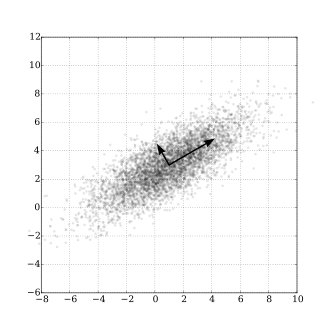

Principal component analysis (PCA) is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called principal components. The number of principal components is less than or equal to the number of original variables.

This trick is going to spread the data out (esp helpful for those one hot encoded data) among different dimensions which are lined up based on how variation they contribute to the overall varaibility of the data


# Excercise: 

- Lookup what sklearn preprocessing does
- What is the StandardScaler() doing here? 
- Why do you suspect we drop the 'Churn Column here?
- Experiment with the n_components to  get a feel for what it does and when the code breaks


In [30]:
# display sorted eigenvalues
from sklearn import preprocessing
from sklearn.decomposition import PCA
scaler = preprocessing.StandardScaler().fit(churn_encoded_numeric.drop('Churn', axis=1))
X_scaled = preprocessing.scale(churn_encoded_numeric, with_mean=True, with_std=True )   # same as (df-df.mean())/df.std(ddof=0)
# start w n_components principal components and see how much variance that gives me
n_components = 20
# create instance of PCA (constructor)
pca = PCA(n_components=n_components)
#pca = PCA(copy=True, iterated_power='auto', n_components=n_components, random_state=None, svd_solver='auto', tol=0.0, whiten=False) 
pca.fit(X_scaled)
np_pcomps = pca.transform(X_scaled)  #get the actual principal components as vectors
print(pca.explained_variance_ratio_) 

[0.25092456 0.12947509 0.09570503 0.05347215 0.04790256 0.04171451
 0.03487074 0.03250347 0.02846478 0.02710553 0.02668591 0.02504564
 0.02424264 0.02358234 0.0223874  0.02075444 0.02053277 0.01920122
 0.01849096 0.01750594]


/Users/robert.a.chesebrough@ibm.com/.conda/envs/mldl/lib/python2.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  """


In [31]:
label = churn_encoded_numeric['Churn']

# Copy the PCA data to a Dataframe and print the top few rows

Its really nice to turn the principal componets into a data frame of them

explore the shape of pcomps - how is it similar or different from churn_encoded_numeric?

Important conceptual take away - 

- same number of rows for principal components - just different number of columns
- each row instance of original data is paired with the same exact row in churn_encoded_numeric
- PCA is commonly used for dimensionality reduction
- Its also great for comparing the spreadyiness of data in for different amounts of combinations of columns

In [32]:
Col_headings = ['P'+str(x) for x in range(n_components)]
pcomps = pd.DataFrame(np_pcomps) 
pcomps.columns = Col_headings
# concatenate the Churn column on the end so its easy to plot by Churn
if 'Churn' not in pcomps.columns:
    pcomps = pd.concat([pcomps, label], axis=1)
pcomps.head()


,P0,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P11,P12,P13,P14,P15,P16,P17,P18,P19,Churn
0,-2.528976,-2.748466,4.899128,1.205612,2.556107,1.681480,-2.088787,-0.808229,1.507799,-1.110160,...,0.557247,0.202601,-0.325362,-0.399691,2.122944,-0.801915,0.489052,0.834439,0.282956,0
1,-0.355328,-0.975263,1.814465,-1.555985,-3.480778,-1.689358,1.132114,0.794141,1.001162,2.233860,...,0.118453,1.381234,2.169831,0.789243,1.435680,0.406162,0.662525,0.654139,1.005201,0
2,-1.170119,-2.728722,0.808085,-1.366590,-2.177435,-1.304206,-0.711659,-2.091917,0.682081,-1.778453,...,-0.595978,1.706460,0.947510,1.257783,1.698254,1.096063,0.360825,0.101043,-0.391538,1
3,-1.288863,0.060967,6.873460,1.589585,-1.850041,-1.486985,-0.451509,0.958694,0.068301,2.694159,...,0.165766,0.021287,0.928012,0.379270,1.202245,-1.958148,0.365760,-1.729210,0.140487,0
4,-2.077411,-4.106618,-1.577072,-0.511161,-0.127879,1.426245,0.050460,-0.598488,-0.242106,0.170874,...,0.481831,0.125908,-0.301014,0.582035,1.173937,-1.406096,0.254513,-0.363619,1.377905,1


# PCA Scree Plot

### Overview

A Scree Plot is a simple line segment plot that shows the fraction of total variance in the data as explained or represented by each PC. The PCs are ordered, and by definition are therefore assigned a number label, by decreasing order of contribution to total variance. The PC with the largest fraction contribution is labeled with the label name from the preferences file. Such a plot when read left-to-right across the abscissa can often show a clear separation in fraction of total variance where the 'most important' components cease and the 'least important' components begin. The point of separation is often called the 'elbow'.  (In the PCA literature, the plot is called a 'Scree' Plot because it often looks like a 'scree' slope, where rocks have fallen down and accumulated on the side of a mountain.)

<IPython.core.display.Javascript object>


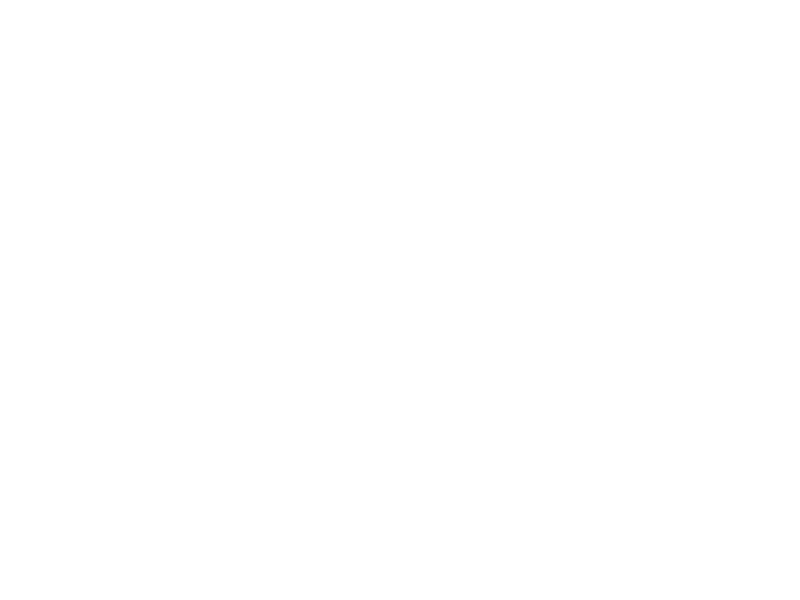

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# bin is my x axis variable
bin = []
for i in range (n_components):
    bin.append(i+1)
# plot the cummulative variance against the index of PCA
cum_var = np.cumsum(pca.explained_variance_ratio_)
plt.plot(bin, cum_var)
# plot the 95% threshold, so we can read off count of principal components that matter
plt.plot(bin, [.95]*n_components, '--')
plt.plot(bin, [.75]*n_components, '--')
plt.plot(bin, [.67]*n_components, '--')
#turn on grid to make graph reading easier
plt.grid(True)
#plt.rcParams.update({'font.size': 24})
plt.suptitle('PC Variance Explained')
plt.xlabel('Number of PC Components', fontsize=18)
plt.ylabel('Fraction of Variance \nExplained', fontsize=16)
# control number of tick marks, 
plt.xticks([i for i in range(0,n_components)])
plt.show()

# Plot Principal Components: Scatter Matrix

Scatter Matrix using PCA allows us to see patterns of multiple dimensions fo data visually. It helps to get a better feel for where you might want to drive and exploration

Control the **colors** by the ** churn variable** or by the cluster they are in

Get a feel for clsutering beahvior

* **black = no churn**

* **red = churn**

In [34]:
pcomps.head()

,P0,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P11,P12,P13,P14,P15,P16,P17,P18,P19,Churn
0,-2.528976,-2.748466,4.899128,1.205612,2.556107,1.681480,-2.088787,-0.808229,1.507799,-1.110160,...,0.557247,0.202601,-0.325362,-0.399691,2.122944,-0.801915,0.489052,0.834439,0.282956,0
1,-0.355328,-0.975263,1.814465,-1.555985,-3.480778,-1.689358,1.132114,0.794141,1.001162,2.233860,...,0.118453,1.381234,2.169831,0.789243,1.435680,0.406162,0.662525,0.654139,1.005201,0
2,-1.170119,-2.728722,0.808085,-1.366590,-2.177435,-1.304206,-0.711659,-2.091917,0.682081,-1.778453,...,-0.595978,1.706460,0.947510,1.257783,1.698254,1.096063,0.360825,0.101043,-0.391538,1
3,-1.288863,0.060967,6.873460,1.589585,-1.850041,-1.486985,-0.451509,0.958694,0.068301,2.694159,...,0.165766,0.021287,0.928012,0.379270,1.202245,-1.958148,0.365760,-1.729210,0.140487,0
4,-2.077411,-4.106618,-1.577072,-0.511161,-0.127879,1.426245,0.050460,-0.598488,-0.242106,0.170874,...,0.481831,0.125908,-0.301014,0.582035,1.173937,-1.406096,0.254513,-0.363619,1.377905,1


In [35]:
churn_encoded_numeric.columns

Index([u'Unnamed: 0', u'Contract0', u'Contract1', u'Contract2', u'Dependents0',
       u'Dependents1', u'DeviceProtection0', u'DeviceProtection1',
       u'DeviceProtection2', u'InternetService0', u'InternetService1',
       u'InternetService2', u'MultipleLines0', u'MultipleLines1',
       u'MultipleLines2', u'OnlineBackup0', u'OnlineBackup1', u'OnlineBackup2',
       u'OnlineSecurity0', u'OnlineSecurity1', u'OnlineSecurity2',
       u'PaperlessBilling0', u'PaperlessBilling1', u'Partner0', u'Partner1',
       u'PaymentMethod0', u'PaymentMethod1', u'PaymentMethod2',
       u'PaymentMethod3', u'PhoneService0', u'PhoneService1',
       u'StreamingMovies0', u'StreamingMovies1', u'StreamingMovies2',
       u'StreamingTV0', u'StreamingTV1', u'StreamingTV2', u'TechSupport0',
       u'TechSupport1', u'TechSupport2', u'gender0', u'gender1',
       u'SeniorCitizen', u'tenure', u'MonthlyCharges', u'TotalCharges',
       u'Churn', u'dbsPCA'],
      dtype='object')

# Experiment with scatter matrix and multidimensional data

- add or subtract attributes to attributes = ['P0', 'P1', 'P2', 'P3', 'P4']
- experiment with various columns such as DeviceProtection2 or DeviceProtection1 and see where they are represented in multidimensional PCA scatter
 - can you begin to see populations or natural grouping of clients here?
- change the code to see where Churn candidates live

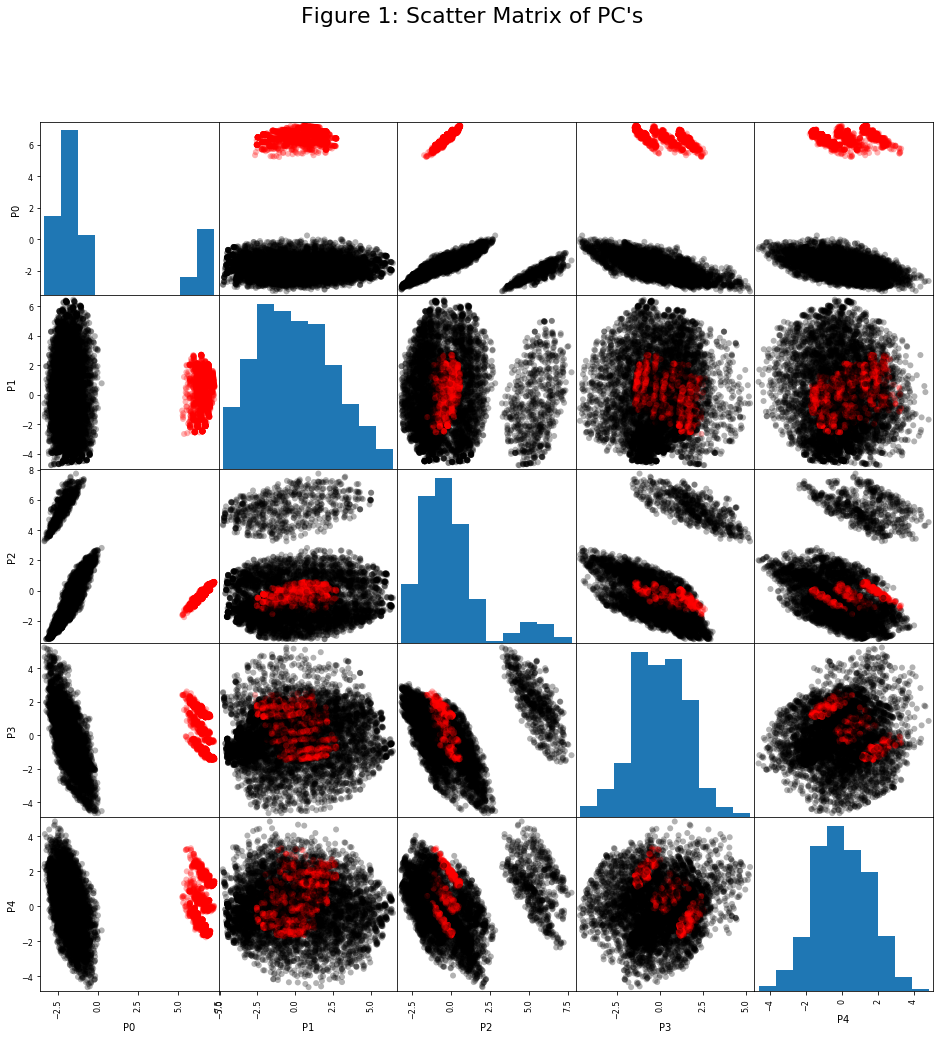

In [36]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
%matplotlib inline

# color the plot by the Churn variable
# attributes are the index of Principal components to plot against each other
attributes = ['P0', 'P1', 'P2', 'P3', 'P4']
churn_colors=['black', 'red']  # colors to use to plot churners
# make a scatter plot
#scatter_matrix(pcomps[attributes], alpha =.3, marker='o',c=churn_encoded_numeric['DeviceProtection0'].apply(lambda x:churn_colors[x]), figsize=[16,16])
#scatter_matrix(pcomps[attributes], alpha =.3, marker='o',c=churn_encoded_numeric['DeviceProtection1'].apply(lambda x:churn_colors[x]), figsize=[16,16])
scatter_matrix(pcomps[attributes], alpha =.3, marker='o',c=churn_encoded_numeric['DeviceProtection2'].apply(lambda x:churn_colors[x]), figsize=[16,16])
#scatter_matrix(pcomps[attributes], alpha =.3, marker='o',c=churn_encoded_numeric['InternetService0'].apply(lambda x:churn_colors[x]), figsize=[16,16])
#scatter_matrix(pcomps[attributes], alpha =.3, marker='o',c=churn_encoded_numeric['InternetService1'].apply(lambda x:churn_colors[x]), figsize=[16,16])
#scatter_matrix(pcomps[attributes], alpha =.3, marker='o',c=churn_encoded_numeric['InternetService2'].apply(lambda x:churn_colors[x]), figsize=[16,16])

#scatter_matrix(pcomps[attributes], alpha =.3, marker='o',c=churn_encoded_numeric['gender1'].apply(lambda x:churn_colors[x]), figsize=[16,16])

plt.suptitle("Figure 1: Scatter Matrix of PC's", fontsize = 22)
plt.show()


## PCA notes

vertical clusters in columns such as those observed in P0 tend to not covary much with other other componets.  Clusters that align diagonally, say in plots P0 vs P4, indicate that the cluster varies with compenent 0 and 4 in a linear fashion and three bands indicates that there are three thresholds that govern the separtion of each the the three banded diagonal clusters. Coloring by our label could give us insight into which clusters to examine in more detail. For example, we can cut the tall vertical cluster in P0 out from the rest for deeper analysis.

## Method to Drill Down to Specific Portion of the Data
We are keying off the graph above and noticing that P0 < 0 covers a major portionof the clusters

So what makes this part of the tick?

In [37]:
churn_encoded_numeric[pcomps['P0']>0].describe()

,Unnamed: 0,Contract0,Contract1,Contract2,Dependents0,Dependents1,DeviceProtection0,DeviceProtection1,DeviceProtection2,InternetService0,...,TechSupport1,TechSupport2,gender0,gender1,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,dbsPCA
count,1528.000000,1528.000000,1528.000000,1528.000000,1528.000000,1528.000000,1528.000000,1528.0,1528.000000,1528.000000,...,1528.000000,1528.000000,1528.000000,1528.000000,1528.000000,1528.000000,1528.000000,1528.000000,1528.000000,1528.000000
mean,3514.384162,0.342932,0.238874,0.418194,0.577880,0.422120,0.001309,0.0,0.998691,0.001309,...,0.000654,0.998691,0.489529,0.510471,0.034138,30.514398,21.122349,673.376999,0.073953,1.998691
std,1987.104056,0.474844,0.426535,0.493424,0.494059,0.494059,0.036167,0.0,0.036167,0.036167,...,0.025582,0.036167,0.500054,0.500054,0.181397,24.357731,2.477612,565.795717,0.261780,0.036167
min,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000,1.000000
25%,1802.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,8.000000,19.700000,161.525000,0.000000,2.000000
50%,3501.500000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,1.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,25.000000,20.150000,528.500000,0.000000,2.000000
75%,5217.250000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.0,1.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,52.250000,20.900000,1120.187500,0.000000,2.000000
max,7037.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,72.000000,59.500000,2284.431783,1.000000,2.000000





# CLUSTERING

Where are the natural flocking behaviors of clients here?

### One Approach to Outliers (DBSCAN Visualization)

It is worth the effort to familiarize ourself with various means of depicting and identifying clsuters of data in what is known as unsupervised learning - here is a great gallery to get started https://scikit-learn.org/stable/modules/clustering.html

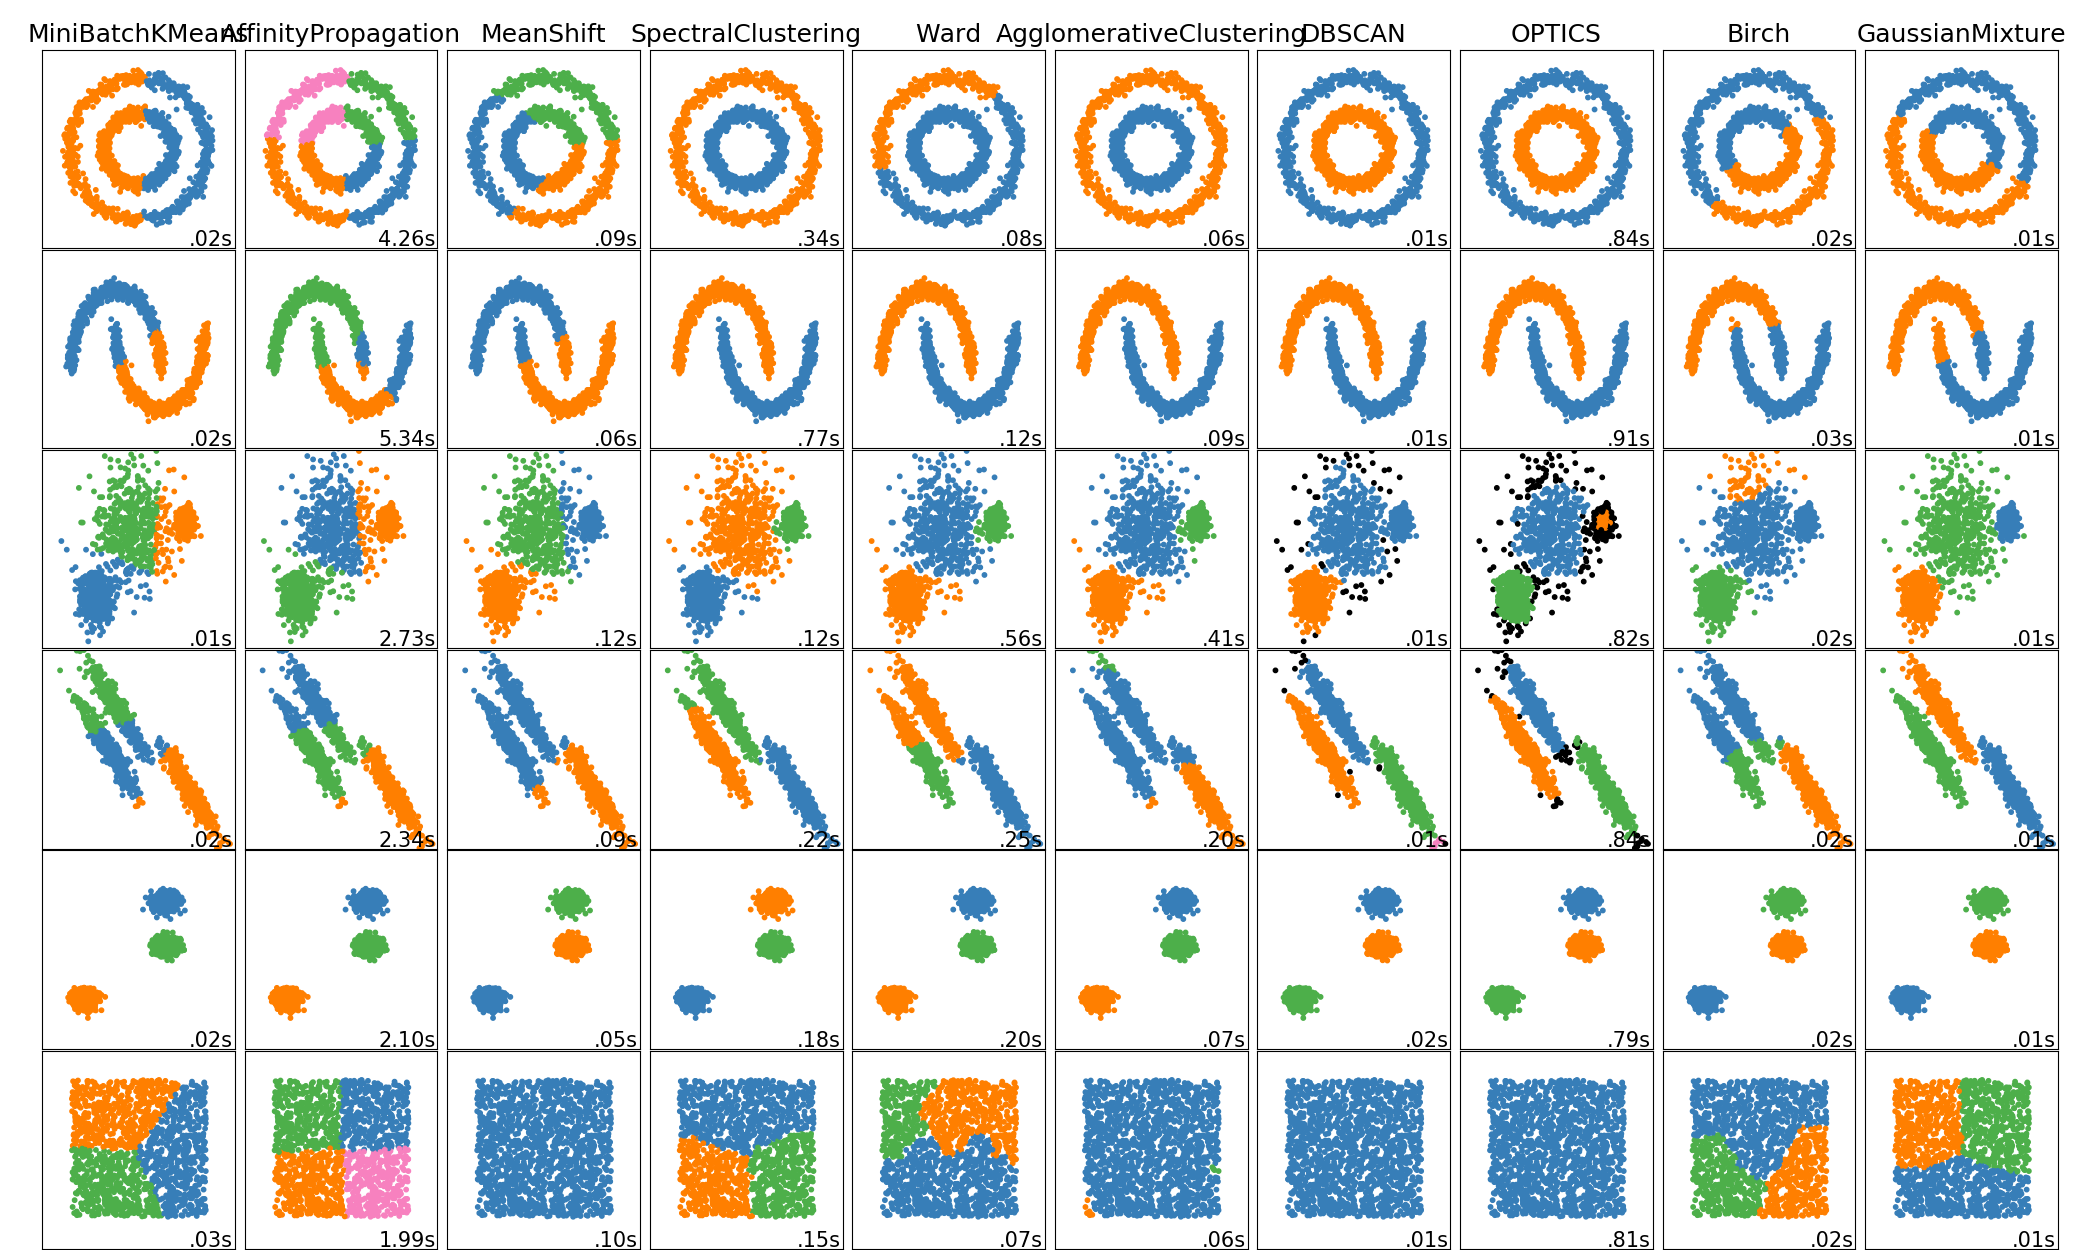


In the code below I have implemented a DBSCAN clustering mechanism which allows you to find different kinds of clsuters and even outliers not in a cluster 

Control the **colors** by the **cluster** they are in to get a feel for clustering behavior

I added the **cluster number to the dataframe** so we can drill down as needed to examine a cluster in more detail.

When we create the model we might decide to take advantage of our feature engineering here or we might decide to let the ML/DL algorithm use all the data to make predictions.

**NOTE:** Be careful with relying on the cluster number. These were established by random selection. So each time we run we may get a different cluster number for what humans percieve as a clsuter or the k-means may find different clusters entirely. Specifying a random seed or using a different cluster methods, such SOM may make this part more rubust.

It would be great if we coudl isolate the different communities from each other and see if this effects the chrun prediction

For dbscan, when looking for outliers, I adjust the eps value to find a way to have a small number of clusters and the Outlier cluster (index = -1) be  on the order of 1% or 2% of the total number of observations





eps:4.2 Estimated number of clusters: 3
Outliers: 117:   Estimated number of clusters: 3


/Users/robert.a.chesebrough@ibm.com/.conda/envs/mldl/lib/python2.7/site-packages/ipykernel_launcher.py:95: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


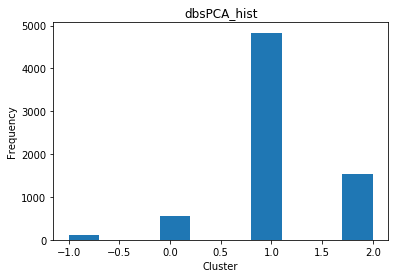

In [38]:
### import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

X = pcomps
eps = 4.2

number_of_eigens = 10
#subset_cols = X.columns[:10]
#pcomps2, labels, n_clusters = pdutil_dbscan(X[subset_cols], 4.2)  # call pd_dbscan with df=X, eps = 4.2

subset_cols = X.columns[:number_of_eigens] 
lst = subset_cols.tolist()

pcomps, labels, n_clusters = pdutil_dbscan(X[lst], eps)  # call pd_dbscan with df=X, eps = 4.2

dbsPCA_hist = pcomps.dbsPCA
print('Outliers: {}:   Estimated number of clusters: {}'.format(  dbsPCA_hist.tolist().count(-1),  n_clusters) )
plt.hist( dbsPCA_hist)
plt.title("dbsPCA_hist")
plt.xlabel("Cluster")
plt.ylabel("Frequency")
#plt.axis([-1,n_clusters,0,7200])
plt.show()

## Copying the dcscan column info for convenience

In [39]:
if 'dbsPCA' not in churn_encoded_numeric.columns:
    churn_encoded_numeric = pd.concat([churn_encoded_numeric, pcomps['dbsPCA']], axis=1)
churn_encoded_numeric.head()

,Unnamed: 0,Contract0,Contract1,Contract2,Dependents0,Dependents1,DeviceProtection0,DeviceProtection1,DeviceProtection2,InternetService0,...,TechSupport1,TechSupport2,gender0,gender1,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,dbsPCA
0,0,1,0,0,1,0,1,0,0,1,...,0,0,1,0,0.0,1,29.85,29.850000,0,0
1,1,0,1,0,1,0,0,1,0,1,...,0,0,0,1,0.0,34,56.95,1889.500000,0,1
2,2,1,0,0,1,0,1,0,0,1,...,0,0,0,1,0.0,2,53.85,2284.431783,1,1
3,3,0,1,0,1,0,0,1,0,1,...,1,0,0,1,0.0,45,0.00,1840.750000,0,0
4,4,1,0,0,1,0,1,0,0,0,...,0,0,1,0,0.0,2,70.70,2284.431783,1,1


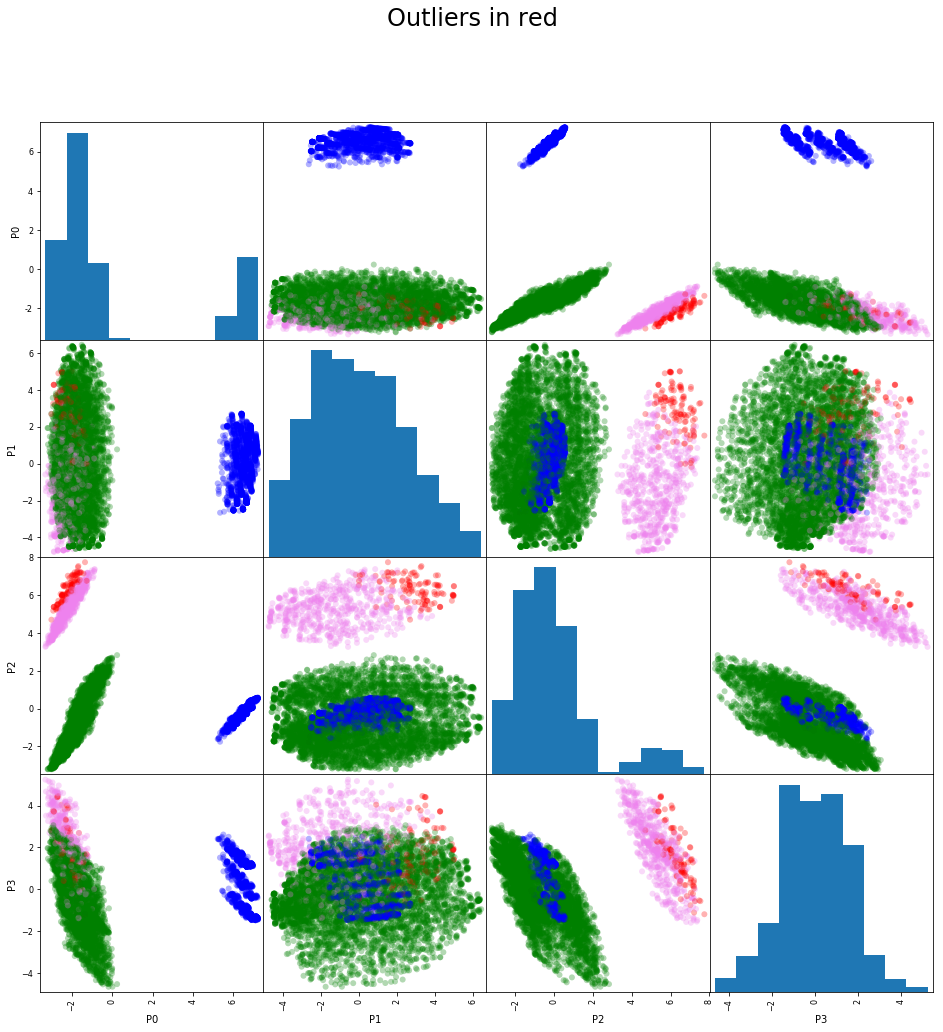

In [40]:
# Figure 2
# plot each cluster a different color so we can see what cluster number is associated with each blob
df2 = pcomps
#df2 = pcomps[pcomps['Churn'] == 1]

#control how many and order of scatter plots to compare
attributes = ['P0', 'P1', 'P2', 'P3']

# if we generate too many clusters we run out of colors to display them.
colors=['red', 'violet','green','blue', 'yellow', 'black', 'gray', 'white', 'orange']
#dbscan numbers clusters from -1 to some positive number, the negative ones I want to color red, I use lambda to do this
scatter_matrix(df2[attributes],figsize=[16,16],marker='o', alpha=.3, c=df2['dbsPCA'].apply(lambda x:colors[x+1]))
plt.suptitle("Outliers in red", fontsize = 24)
plt.show()

In [41]:
print('Outliers: {} '.format(  dbsPCA_hist.tolist().count(-1)) )
churn_encoded_stats = pd.DataFrame(churn_encoded_numeric[churn_encoded_numeric['dbsPCA']<0].describe())

Outliers: 117 


In [42]:
churn_encoded_stats
#churn_encoded_numeric.plot(kind='bar', title='Number of Unique Valuess', ylim=(0,10), figsize=(15, 5) )

,Unnamed: 0,Contract0,Contract1,Contract2,Dependents0,Dependents1,DeviceProtection0,DeviceProtection1,DeviceProtection2,InternetService0,...,TechSupport1,TechSupport2,gender0,gender1,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,dbsPCA
count,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.0,117.0,...,117.000000,117.0,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.0
mean,3582.247863,0.008547,0.282051,0.709402,0.324786,0.675214,0.170940,0.829060,0.0,1.0,...,0.829060,0.0,0.538462,0.461538,0.068376,56.940171,54.902564,3165.528904,0.008547,-1.0
std,2169.660068,0.092450,0.451934,0.455991,0.470309,0.470309,0.378076,0.378076,0.0,0.0,...,0.378076,0.0,0.500663,0.500663,0.253476,17.850090,8.422286,1147.871135,0.092450,0.0
min,62.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,29.900000,305.550000,0.000000,-1.0
25%,1481.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,1.0,...,1.000000,0.0,0.000000,0.000000,0.000000,48.000000,49.850000,2317.100000,0.000000,-1.0
50%,3583.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.0,1.0,...,1.000000,0.0,1.000000,0.000000,0.000000,65.000000,56.400000,3281.650000,0.000000,-1.0
75%,5343.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.0,1.0,...,1.000000,0.0,1.000000,1.000000,0.000000,71.000000,60.800000,4122.650000,0.000000,-1.0
max,7007.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.0,...,1.000000,0.0,1.000000,1.000000,1.000000,72.000000,67.200000,4919.700000,1.000000,-1.0


# Comentary: On descriptive statitics 

When the number_of_eigens was set to 10, and the dbscan eps was set to 4.2 we arrive at one view of the churn_encoded_numeric dataframe.  In that particualr case the outliers, reflected by the dbsPCA cluster number = -1, show some interesting behavior.

Filtering the data to look at just outliers (dbsPCA = <0) exhibits interesting behaviors. Doing a describe on the data sllows us to look for patterns visually. What I look for are strange mean values or strange extremes for max or min. We see that P0 < 0 pertains specifically to the class where DeviceProtection2 has a value of 0 for all instances while InternetService0 has a value of 1. Also the Total_chrages seem higher than average. So lets explore that more.

So we are capturing some commonalities that all those in the outlier class exhibit.





# Examine Outliers Statistics Like This

In [43]:
pcomps.head()

,P0,P1,P2,P3,P4,P5,P6,P7,P8,P9,dbsPCA
0,-2.528976,-2.748466,4.899128,1.205612,2.556107,1.681480,-2.088787,-0.808229,1.507799,-1.110160,0
1,-0.355328,-0.975263,1.814465,-1.555985,-3.480778,-1.689358,1.132114,0.794141,1.001162,2.233860,1
2,-1.170119,-2.728722,0.808085,-1.366590,-2.177435,-1.304206,-0.711659,-2.091917,0.682081,-1.778453,1
3,-1.288863,0.060967,6.873460,1.589585,-1.850041,-1.486985,-0.451509,0.958694,0.068301,2.694159,0
4,-2.077411,-4.106618,-1.577072,-0.511161,-0.127879,1.426245,0.050460,-0.598488,-0.242106,0.170874,1


In [44]:
if 'dbsPCA' in pcomps.columns:
    pcomps.drop(['dbsPCA'], axis = 1, inplace=True)

churn_glued = pd.concat([churn_encoded_numeric, pcomps], axis=1)
churn_glued = (churn_glued - churn_glued.min(0)) / (churn_glued.max(0) -churn_glued.min(0))
if 'dbsPCA' in churn_glued.columns:
    churn_glued.drop(['dbsPCA'], axis = 1, inplace=True)
churn_glued = pd.concat([churn_glued,  churn_encoded_numeric['dbsPCA']], axis=1)
    
churn_glued.to_csv('churn_glued.csv')
churn_glued.head()


,Unnamed: 0,Contract0,Contract1,Contract2,Dependents0,Dependents1,DeviceProtection0,DeviceProtection1,DeviceProtection2,InternetService0,...,P1,P2,P3,P4,P5,P6,P7,P8,P9,dbsPCA
0,0.000000,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.181184,0.740606,0.592291,0.758764,0.957698,0.251682,0.341831,0.679696,0.274229,0
1,0.000142,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.339183,0.458843,0.313162,0.120209,0.032573,0.613262,0.582253,0.608622,0.758009,1
2,0.000284,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.182943,0.366916,0.332306,0.258071,0.138278,0.406279,0.149224,0.563859,0.177547,1
3,0.000426,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.431514,0.920949,0.631102,0.292701,0.088114,0.435484,0.606943,0.477754,0.824601,0
4,0.000568,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.060168,0.149048,0.418768,0.474864,0.887649,0.491835,0.373301,0.434208,0.459556,1


# Use a two variable Bar Plot to Compare Descriptive Stats of Outliers to the General Population

Outliers: Blue

General: Red

Here we plot the values of the means of the various columns to see how Outliers compare to the General population

Notice that the outliers have prominent missing or zeros values in key columns. This means the outliers exibhit much different behavior than the gernal population.

They spend more, churn less, have strong perferences for InternetService0 and PhoneService0 without multuiple lines

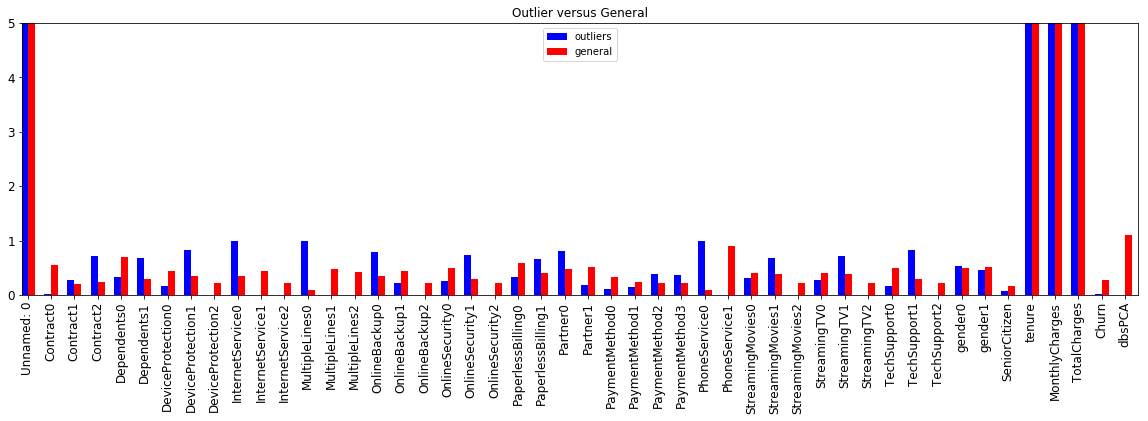

In [45]:
fig = plt.figure() # Create matplotlib figure

churn_outlier_stats = pd.DataFrame(churn_encoded_numeric[churn_encoded_numeric['dbsPCA']<0].describe() )
churn_general_stats = pd.DataFrame(churn_encoded_numeric.describe() )

ax = fig.add_subplot(111) # Create matplotlib axes
#ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = .3
#df.amount.plot(kind='bar', color='red', ax=ax, width=width, position=1)
#df.price.plot(kind='bar', color='blue', ax=ax2, width=width, position=0)
churn_outlier_stats.loc['mean',:].plot(kind='bar', title='Outlier versus General', ylim=(0,5), figsize=[20,5], fontsize = 12, width = width, color = 'b', position = 1, label = 'outliers')
churn_general_stats.loc['mean',:].plot(kind='bar', ylim=(0,5), figsize=[20,5], fontsize = 12, width = width, color = 'r', position =0, label = 'general')
plt.legend()
plt.show()

In [46]:
# should we target marketing dollars at outliers or general population for retention, for revenue, for ?
# would your marketing offer outliersStreamingTV2?
# do you send promotions to outliers to try your new PhoneService0?
# whose business do you value more - outliers, or general ?

In [47]:
churn_outlier_stats.head()

,Unnamed: 0,Contract0,Contract1,Contract2,Dependents0,Dependents1,DeviceProtection0,DeviceProtection1,DeviceProtection2,InternetService0,...,TechSupport1,TechSupport2,gender0,gender1,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,dbsPCA
count,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.0,117.0,...,117.000000,117.0,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.0
mean,3582.247863,0.008547,0.282051,0.709402,0.324786,0.675214,0.170940,0.829060,0.0,1.0,...,0.829060,0.0,0.538462,0.461538,0.068376,56.940171,54.902564,3165.528904,0.008547,-1.0
std,2169.660068,0.092450,0.451934,0.455991,0.470309,0.470309,0.378076,0.378076,0.0,0.0,...,0.378076,0.0,0.500663,0.500663,0.253476,17.850090,8.422286,1147.871135,0.092450,0.0
min,62.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,29.900000,305.550000,0.000000,-1.0
25%,1481.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,1.0,...,1.000000,0.0,0.000000,0.000000,0.000000,48.000000,49.850000,2317.100000,0.000000,-1.0


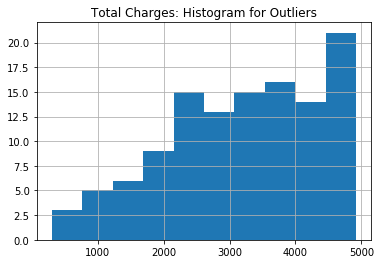

In [48]:
#churn_encoded_numeric[pcomps['dbsPCA']<0].head()
if 'Churn' not in churn_glued.columns:
    churn_glued = pd.concat([churn_encoded_numeric, label], axis=1)  # add numeric to main df
churn_glued[churn_glued['dbsPCA']<0]

plt.title('Total Charges: Histogram for Outliers')
Outliers = churn_encoded_numeric[churn_glued['dbsPCA']<0]['TotalCharges']
Outliers.hist()

## Comparing outlier to the general population

Comparing the outliers we identified and graphed above, we see that outlier total charges tend to be concnetrated above $2000 which means the Telco has generated lots of revenue fro these customers

The general population below mostly has spent much less than $2000

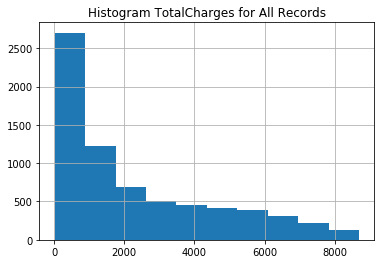

In [49]:
plt.title('Histogram TotalCharges for All Records')
GeneralPop = churn_encoded_numeric['TotalCharges']
GeneralPop.hist()

# Descriptive Statistics of Outliers

Below we shall describe the subset of the population we uncovered as outliers.

Do you see any trends? Look at each column and identify columns that have a very low or very high mean. Especially, look for columns with a mean of 0 or 1. These values indicate that the entire column has a single through every instance. Also, look for any means that differ significantly from the general population.

In [50]:
churn_glued[churn_glued['dbsPCA']<0].describe()

,Unnamed: 0,Contract0,Contract1,Contract2,Dependents0,Dependents1,DeviceProtection0,DeviceProtection1,DeviceProtection2,InternetService0,...,P1,P2,P3,P4,P5,P6,P7,P8,P9,dbsPCA
count,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.0,117.0,...,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.0
mean,0.508698,0.008547,0.282051,0.709402,0.324786,0.675214,0.170940,0.829060,0.0,1.0,...,0.687236,0.870113,0.636633,0.615387,0.549701,0.519548,0.511144,0.499711,0.359103,-1.0
std,0.308103,0.092450,0.451934,0.455991,0.470309,0.470309,0.378076,0.378076,0.0,0.0,...,0.106981,0.057001,0.130299,0.157169,0.389844,0.143539,0.186953,0.192436,0.169405,0.0
min,0.008804,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,...,0.410062,0.722520,0.350171,0.240159,0.066725,0.187281,0.154711,0.148274,0.017222,-1.0
25%,0.210310,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,1.0,...,0.631185,0.831227,0.551228,0.528934,0.133510,0.435558,0.296647,0.396902,0.244757,-1.0
50%,0.508804,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.0,1.0,...,0.696525,0.870612,0.620485,0.652786,0.858668,0.535592,0.596092,0.461107,0.326895,-1.0
75%,0.758733,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.0,1.0,...,0.751414,0.908712,0.717420,0.718920,0.910185,0.610930,0.649109,0.574536,0.494533,-1.0
max,0.995030,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.0,...,0.872094,1.000000,0.921303,0.951734,0.973727,0.854827,0.756042,0.966662,0.834306,-1.0


# Using a Heatmap to view the entire data set

This works for toy datasets and for real world feature engineered datasets where a date range and subset of colulmns might be chosen to make visualization managable.

In real world data sometime this make sense anyway - limit a dataset view to just this years product feature set and maybe a single quarters worth of data. The value of this visual is in sorting columns to see how columns vary with one another. This type of plot allows me to view the entire dataset in one single view and observe patterns as I sort different columns

For example, play with the different between the heatmap NOT sorted sersus one sorted against P0

bobHeatmap(churn_glued, ' ')

bobHeatmap(churn_glued, 'P0')

The P0 cariable is the longest axis in a PCA plot - it expresses the most statstical variability i the dataset, which is kind of like saying if I had only one variable with which to describe my data the P0 would be the smart choice.

The legend of the graph is not idea, it seems to show values ranging from 0 (black) to 2(white) when the data itself is completely described by a range of values form 0 to 1 (black to red). Continuous variable such as MonthlyCharges or P0 generally gradually blend and seems muted when sorted randomly. Categorical values are represetned as being either on or off, 0 or 1, and are therefor plotted as black (0), or fiery red (1).

Vertical or horizontal patterns that the eye picts out have meaning. Horizontal banding means some columns are better correlated at least over a range of values.
Vertical stripes of red or black indicate that the rows or customer ID's are behaving in a very similar way for longer stretches

Careful examplination and "What If" questions begin to really draw insight out of these heatmaps and they begin to reveal patterns of behavior of the customers - as either forced upon them by product marketing decisions (certain contracts and packages are only ever bundled together), or are expressions of customers decisions such as staying or leaving (churn), tenure, monthly charges, which plan they selected etc


In [51]:
def bobHeatmap(df,sortColumn):
    import matplotlib.pyplot as plt
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    df = (df - df.min(0)) / (df.max(0) -df.min(0))

    plt.figure(figsize=(20, 10))
    
    CMAP = "gist_heat"
    #CMAP = "gist_ncar"
    
    if(sortColumn not in df.columns): # check if a sort column was passed in
        ax = sns.heatmap(df, yticklabels = 1000, cmap=CMAP, center = 1)
    else:
        ax = sns.heatmap(df.sort_values(by=[sortColumn]), yticklabels = 1000, cmap=CMAP, center = 1)
    #ax = sns.heatmap(df, yticklabels = 1000, cmap=CMAP, center = 1)
    


In [52]:
bobHeatmap(churn_glued, '')
# each  row in dataset is a thin horizontal multicolored strip
# Do you see any geometric patterns here or do the colors seem random?

ImportError: No module named seaborn

In [ ]:
bobHeatmap(churn_glued, 'dbsPCA')  # Sort and repeat
# each  row in dataset is a thin horizontal multicolored strip
# Do you see any geometric patterns here or do the colors seem random?
# Are you detecting more than one pattern?
# Why?
# can you find flocking behavior here?

# Modeling

## Split Data - Training/Test

Splitting the data can be a very easy thing but its also easy to get into trouble.

We want to ensure that in subsequent runs we never contaminate the test set from run to run. Using a random seed help something like randseed = 42

But if we ever drop or add rows, and then use the same random selection we will likely wind up putting a new value into our test set inadvertantly.

It would be best to split the data based on some invariant such as a hask of column names or some other unique row identifier. But for now we take the easy random split approach.

In [ ]:
# to make this notebook's output identical at every run
np.random.seed(42)
# For illustration only. Sklearn has train_test_split()
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

def split_train_test2(data, labels, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices], labels.iloc[train_indices], labels.iloc[test_indices]

churn_encoded_numeric
#churn_scaled = pd.concat([churn_cat['customerID'], churn_encoded_numeric], axis=1)
#churn_scaled.head()
#if ( len(churn_scaled.customerID.unique()) ==  len(churn_encoded_numeric)) : print "Unique Identifier"



# First Model - Decision Tree

Use churn_scaled dataframe which is a more minimally processed version of our raw data - all numeric, but no pca at this point.

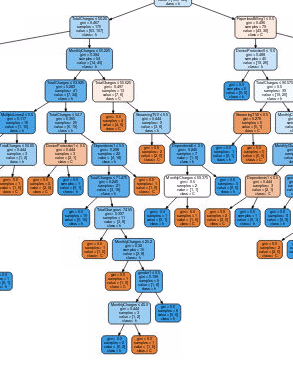

In [ ]:
X = churn_encoded_numeric
train_set, test_set = split_train_test(X, 0.2)

In [ ]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.metrics import confusion_matrix

clf = DecisionTreeClassifier(random_state=42, max_depth = 3)
AllCols = X.columns
StaticCols = ['Churn','dbsPCA']

dataCols = (list(set(AllCols) - set(StaticCols)))
clf = clf.fit(train_set[dataCols], train_set['Churn'])
#accuracy = cross_val_score(clf, churn_cat_encode_new2[dataCols], churn_cat_encode_new2['Churn'], cv=10)
predicted = clf.predict(test_set[dataCols])
print ("accuracy: {}".format(accuracy_score(test_set['Churn'], predicted ) ))

# import graphviz
# dot_data = tree.export_graphviz(clf, out_file=None) 
# graph = graphviz.Source(dot_data) 
# dot_data = tree.export_graphviz(clf, out_file=None, 
#                          feature_names=dataCols,  
#                          class_names=['Training No Churn','Training Churn'],
#                          filled=True, rounded=True,  
#                          special_characters=True) 
# graph.render("Churn")   #to copy to pdf
# graph = graphviz.Source(dot_data) 
# graph.render("TreeModel")
# graph   #churners orange, non chutners blue


class_names =  ['Test Set No Churn','Test Set Churn']  
cnf_matrix = confusion_matrix(test_set['Churn'], predicted)

plot_confusion_matrix(cnf_matrix, class_names)
#graph

In [ ]:
# Lets say NoChurn is negative, Churn is positive
# in the above confusion matrix, can you identify false postives, false negatives, tru positives, tru negatives
# how would you compute accuracy by hand?

# Optional:

uncomment the code for graphically printing the decision tree using Graphviz - this will require you to look online to see how to install GrpahViz

## Confusion plot matrix

The confusion matrix is a data science term used to describe the nature of true versus false positives and negative results. Here it is implemended as a heatamp. The diagonal major axis expresses our accuracy, while the off diagonal indicates how our model mispredicted by erroring on false positives or negatives.

Wikipedia has a nice writeup of confusion matrix here: https://en.wikipedia.org/wiki/Confusion_matrix

## Comprehending the decision tree diagram

Decision trees are one of the more human readable models out there and it pairs nicely with atree diagram as depicted above.

Playing with a tree diagram is the best way to learn how to read it. See if you can describe the path it takes to find the most Churners, by selecting Contract0, InternetService1, and tenure. Can you specify the trhreshold values used for these columns in order to find the highest churn density?

Follow the tree from the top and modify the query below to match the cloumns/conditions you observe in the tree

This should give you a sense of how you can filter your data to observe behaviors associated with the most concentrated pockets of Churners (blue) or Non Churners (orange) in this case.

If you want to increase your odds of finding non-churners direct your query more to the dark orange leaf nodes. To experiment with high likelihood churners point your attention to the darkest blue boxes.

Answer: Contract0 == 1, InternetService1 == 1, tenure <= 14.5 --> finds 546 out of 785 samples to be churners which is about a 69% chance of finding a churner.
had we just drawn randomly for the entire data set our chances of finding a churner would only have been 1497/5635 ~ 26.5%

Overall, this decision tree model, in aggregate, acheived a 79% - 80% accuracy

In [ ]:
# look for the Lowest density of Churners in the graph above - see if you can find the 12 churners out of 1040 samples by using boolean logic applied to coulmns and using the thresholds identified in the graph
q = (train_set['Contract0'] < 0.5) & (train_set['MonthlyCharges']< 93.675) & (train_set['Contract1'] <= 0.5)
print ("total number of customers in this sub population: {}".format(len(train_set[q])))
print ("Churners in this sub population: \t\t  {}".format(  (train_set[q]['Churn'] ==1).sum()  ))
print ("Non Churners in this sub population: \t\t  {}".format(  (train_set[q]['Churn'] < 1).sum()  ))